# Download dan Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Download dataset Gallstone dari kaggle(https://www.kaggle.com/datasets/xixama/gallstone-dataset-uci?resource=download)
import kagglehub

# Download latest version
path = kagglehub.dataset_download("xixama/gallstone-dataset-uci")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'gallstone-dataset-uci' dataset.
Path to dataset files: /kaggle/input/gallstone-dataset-uci


In [ ]:
#Load Dataset
import numpy as np
import pandas as pd

data=pd.read_csv("/kaggle/input/gallstone-dataset-uci/gallstone_.csv")

print(data)

     Gallstone Status  Age  Gender  Comorbidity  \
0                   0   50       0            0   
1                   0   47       0            1   
2                   0   61       0            0   
3                   0   41       0            0   
4                   0   42       0            0   
..                ...  ...     ...          ...   
314                 1   49       0            0   
315                 1   31       1            0   
316                 1   58       0            0   
317                 1   37       1            0   
318                 1   60       1            0   

     Coronary Artery Disease (CAD)  Hypothyroidism  Hyperlipidemia  \
0                                0               0               0   
1                                0               0               0   
2                                0               0               0   
3                                0               0               0   
4                                0   

# Exploratory Data Analysis (EDA)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

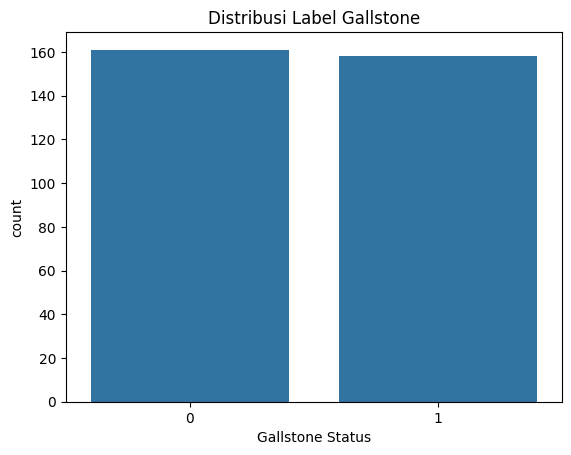

In [ ]:
# Distribusi Target
sns.countplot(x=data["Gallstone Status"])
plt.title("Distribusi Label Gallstone")
plt.show()

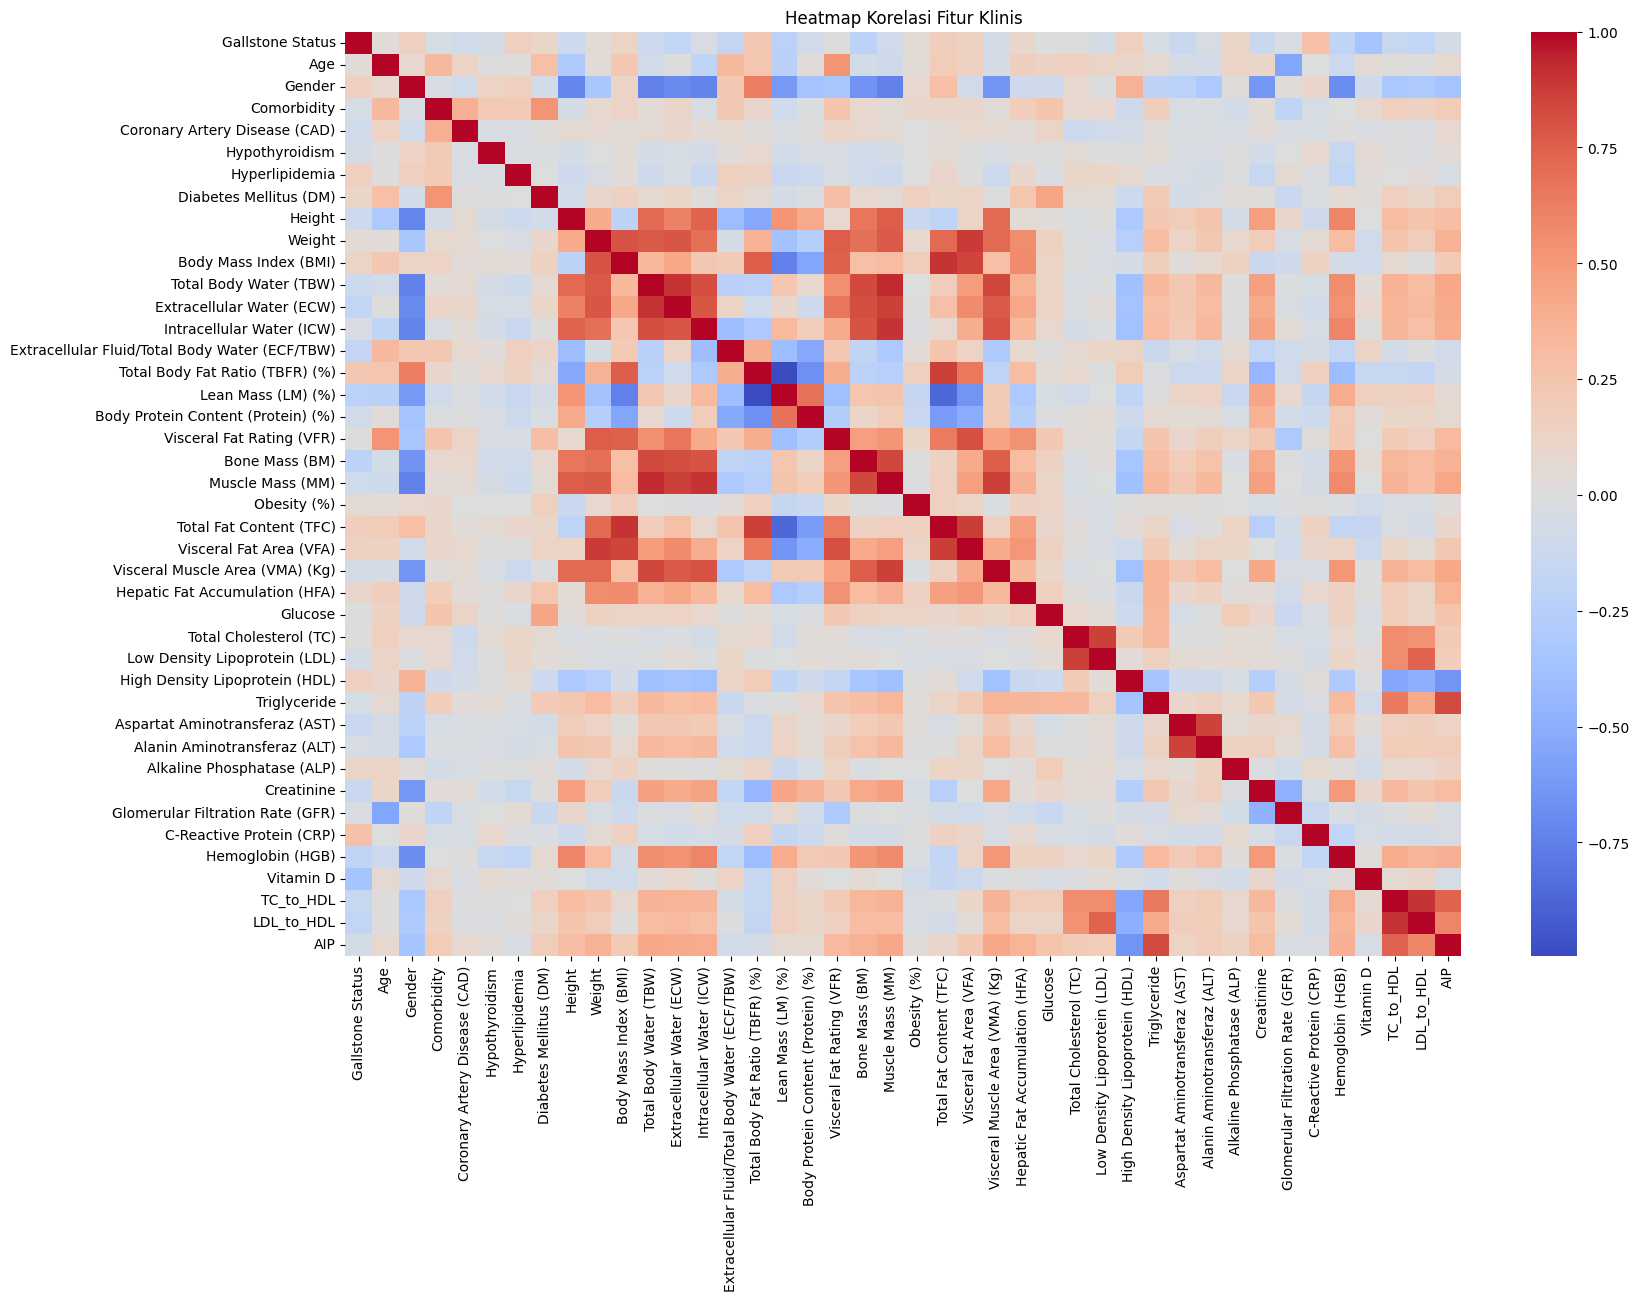

In [ ]:
# Heatmap Korelasi
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(), cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Klinis")
plt.show()

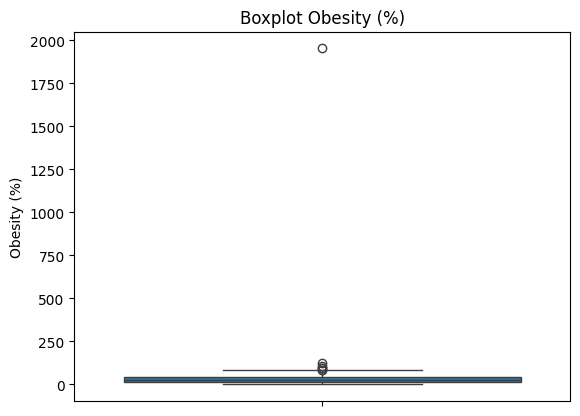

In [ ]:
#Boxplot Obesity (%)
sns.boxplot(y="Obesity (%)", data=data)
plt.title("Boxplot Obesity (%)")
plt.show()

# Data Cleaning

In [ ]:
#cek informasi dari dataset Gallstone
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 42 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Gallstone Status                                319 non-null    int64  
 1   Age                                             319 non-null    int64  
 2   Gender                                          319 non-null    int64  
 3   Comorbidity                                     319 non-null    int64  
 4   Coronary Artery Disease (CAD)                   319 non-null    int64  
 5   Hypothyroidism                                  319 non-null    int64  
 6   Hyperlipidemia                                  319 non-null    int64  
 7   Diabetes Mellitus (DM)                          319 non-null    int64  
 8   Height                                          319 non-null    int64  
 9   Weight                                     

In [ ]:
data.head()

,Gallstone Status,Age,Gender,Comorbidity,Coronary Artery Disease (CAD),Hypothyroidism,Hyperlipidemia,Diabetes Mellitus (DM),Height,Weight,...,Alanin Aminotransferaz (ALT),Alkaline Phosphatase (ALP),Creatinine,Glomerular Filtration Rate (GFR),C-Reactive Protein (CRP),Hemoglobin (HGB),Vitamin D,TC_to_HDL,LDL_to_HDL,AIP
0,0,50,0,0,0,0,0,0,185,92.8,...,22.0,87.0,0.82,112.47,0.0,16.0,33.0,6.250000,4.375000,1.208960
1,0,47,0,1,0,0,0,0,176,94.5,...,13.0,46.0,0.87,107.10,0.0,14.4,25.0,4.000000,2.511628,0.873529
2,0,61,0,0,0,0,0,0,171,91.1,...,14.0,66.0,1.25,65.51,0.0,16.2,30.2,4.162791,2.883721,0.472906
3,0,41,0,0,0,0,0,0,168,67.7,...,12.0,34.0,1.02,94.10,0.0,15.4,35.4,2.932203,1.237288,-0.107246
4,0,42,0,0,0,0,0,0,178,89.6,...,54.0,71.0,0.82,112.47,0.0,16.8,40.6,6.833333,5.133333,2.385700


In [ ]:
#cek nilai yang hilang/missing values
missing_values=data.isnull().sum()

if missing_values.any():
    print("Ada missing values", missing_values)
else:
    print("Tidak ada missing values")

Tidak ada missing values


In [ ]:
#cek duplikat data yang ada didalam dataset
num_duplicates = data.duplicated().sum()
if num_duplicates > 0:
    print(f"\nMenghapus {num_duplicates} data duplikat.")
    data.drop_duplicates(inplace=True)
else:
    print("\nTidak ditemukan data duplikat.")


Tidak ditemukan data duplikat.


In [ ]:
#cek tipedata
data.dtypes

,0
Gallstone Status,int64
Age,int64
Gender,int64
Comorbidity,int64
Coronary Artery Disease (CAD),int64
Hypothyroidism,int64
Hyperlipidemia,int64
Diabetes Mellitus (DM),int64
Height,int64
Weight,float64


In [ ]:
#cek outliers pada dataset
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_mask = (data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))

outlier_count = outlier_mask.sum()
print("jumlah outliers pada kolom")
print(outlier_count)

jumlah outliers pada kolom
Gallstone Status                                   0
Age                                                2
Gender                                             0
Comorbidity                                        2
Coronary Artery Disease (CAD)                     12
Hypothyroidism                                     9
Hyperlipidemia                                     8
Diabetes Mellitus (DM)                            43
Height                                             0
Weight                                             2
Body Mass Index (BMI)                              5
Total Body Water (TBW)                             2
Extracellular Water (ECW)                          1
Intracellular Water (ICW)                          1
Extracellular Fluid/Total Body Water (ECF/TBW)     7
Total Body Fat Ratio (TBFR) (%)                    0
Lean Mass (LM) (%)                                 0
Body Protein Content (Protein) (%)                 8
Visceral Fat Rating

                  Jumlah Data  Persentase (%)
Gallstone Status                             
0                         161           50.47
1                         158           49.53


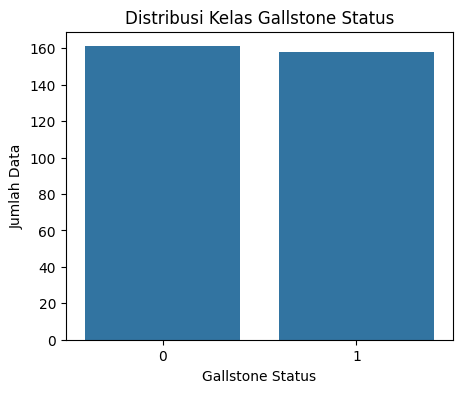

In [ ]:
# cek imbalance data

import matplotlib.pyplot as plt
import seaborn as sns

#hitung jumlah tiap kelas
class_counts = data['Gallstone Status'].value_counts()

# Hitung persentase tiap kelas
class_percent = data['Gallstone Status'].value_counts(normalize=True) * 100

# Tampilkan jumlah & persentase
imbalance_df = pd.DataFrame({
    'Jumlah Data': class_counts,
    'Persentase (%)': class_percent.round(2)
})

print(imbalance_df)

# Visualisasi distribusi kelas
plt.figure(figsize=(5,4))
sns.countplot(x='Gallstone Status', data=data)
plt.title('Distribusi Kelas Gallstone Status')
plt.xlabel('Gallstone Status')
plt.ylabel('Jumlah Data')
plt.show()

In [ ]:
#cek noise
# skala ECF/TBW (ubah persen → rasio)
if "Extracellular Fluid/Total Body Water (ECF/TBW)" in data.columns:
    data["Extracellular Fluid/Total Body Water (ECF/TBW)"] = \
        data["Extracellular Fluid/Total Body Water (ECF/TBW)"] / 100

# batas wajar: 0 – 200
corrected_VMA_limit = (0, 200)

noise_limits = {
    "Age": (0, 120),
    "Height": (80, 250),  # cm
    "Weight": (20, 300),  # kg
    "Body Mass Index (BMI)": (5, 80),
    "Total Body Water (TBW)": (10, 80),
    "Extracellular Water (ECW)": (5, 40),
    "Intracellular Water (ICW)": (5, 60),
    "Extracellular Fluid/Total Body Water (ECF/TBW)": (0.3, 0.5),
    "Total Body Fat Ratio (TBFR) (%)": (1, 80),
    "Lean Mass (LM) (%)": (10, 90),
    "Body Protein Content (Protein) (%)": (5, 40),
    "Visceral Fat Rating (VFR)": (1, 30),
    "Bone Mass (BM)": (0.5, 10),
    "Muscle Mass (MM)": (5, 150),
    "Obesity (%)": (1, 100),
    "Total Fat Content (TFC)": (1, 100),
    "Visceral Fat Area (VFA)": (1, 300),
    "Visceral Muscle Area (VMA) (Kg)": corrected_VMA_limit,
    "Glucose": (40, 500),
    "Total Cholesterol (TC)": (50, 500),
    "Low Density Lipoprotein (LDL)": (10, 400),
    "High Density Lipoprotein (HDL)": (5, 200),
    "Triglyceride": (20, 1500),
    "Aspartat Aminotransferaz (AST)": (5, 500),
    "Alanin Aminotransferaz (ALT)": (5, 500),
    "Alkaline Phosphatase (ALP)": (10, 1000),
    "Creatinine": (0.2, 10),
    "Glomerular Filtration Rate (GFR)": (10, 200),
    "C-Reactive Protein (CRP)": (0, 300),
    "Hemoglobin (HGB)": (5, 25),
    "Vitamin D": (1, 150)
}

noise_report = {}

for col in noise_limits:
    low, high = noise_limits[col]
    if col in data.columns:
        count_noise = data[(data[col] < low) | (data[col] > high)].shape[0]
        noise_report[col] = count_noise
# Tampilkan hasil
pd.DataFrame.from_dict(noise_report, orient='index', columns=["Jumlah Noise"])


,Jumlah Noise
Age,0
Height,0
Weight,0
Body Mass Index (BMI),0
Total Body Water (TBW),0
Extracellular Water (ECW),0
Intracellular Water (ICW),0
Extracellular Fluid/Total Body Water (ECF/TBW),319
Total Body Fat Ratio (TBFR) (%),0
Lean Mass (LM) (%),2


In [ ]:
cols_check = [
    "Extracellular Fluid/Total Body Water (ECF/TBW)",
    "Visceral Muscle Area (VMA) (Kg)"
]

data[cols_check].describe()


,Extracellular Fluid/Total Body Water (ECF/TBW),Visceral Muscle Area (VMA) (Kg)
count,319.000000,319.000000
mean,0.004221,30.403448
std,0.000324,4.460530
min,0.002923,18.900000
25%,0.004008,27.250000
50%,0.004200,30.408108
75%,0.004400,33.800000
max,0.005200,41.100000


# Feature Engineering

In [ ]:
# Menambahkan rasio kolesterol (TC/HDL dan LDL/HDL) dan AIP
eps = np.finfo(float).eps
data['TC_to_HDL'] = data['Total Cholesterol (TC)'] / data['High Density Lipoprotein (HDL)'].replace(0, eps)
data['LDL_to_HDL'] = data['Low Density Lipoprotein (LDL)'] / data['High Density Lipoprotein (HDL)'].replace(0, eps)
data['AIP'] = np.log(data['Triglyceride'] / data['High Density Lipoprotein (HDL)'].replace(0, eps))

# Data Splitting

In [ ]:
# Memisahkan fitur(X) dan target(y)
target = 'Gallstone Status'
X = data.drop(columns=[target])
y = data[target]

In [ ]:
# Split data training dan testing (training 80%, testing 20%)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 255
Jumlah data testing: 64


# Data Transformation

In [ ]:
#standarisasi
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=['int64','float64']).columns
cat_cols = X.select_dtypes(include=['object','bool']).columns

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols)
])

X_train_p = preprocessor.fit_transform(X_train)
X_test_p  = preprocessor.transform(X_test)

# Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from tensorflow.keras.models import Sequential
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

In [ ]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

results = {}

def eval_model(name, y_true, y_pred, y_prob, t):
    print(f"\n=== {name} ===")
    print(f"Training Time: {t:.4f} detik")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    plot_confusion(y_true, y_pred, f"Confusion Matrix - {name}")

    results[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, zero_division=0),
        'Recall': recall_score(y_true, y_pred, zero_division=0),
        'F1-Score': f1_score(y_true, y_pred, zero_division=0),
        'AUC': roc_auc_score(y_true, y_prob),
        'Training Time (s)': t
    }


=== Logistic Regression ===
Training Time: 0.0180 detik

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        32
           1       0.83      0.78      0.81        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



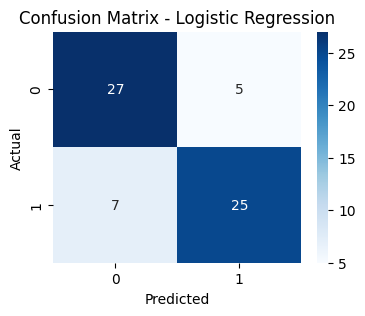


Contoh Prediksi Test Set (Logistic Regression):
   Actual  Predicted  Probability
0       1          1     0.834079
1       1          1     0.998435
2       0          0     0.016643
3       0          0     0.102683
4       0          0     0.000936
5       0          0     0.028307
6       1          1     0.867117
7       1          1     0.622087
8       1          1     0.719638
9       1          1     0.999945


In [ ]:
#@title Model 1: Logistic Regression

start = time.time()
logreg = LogisticRegression(max_iter=500)
logreg.fit(X_train_p, y_train)
end = time.time()

y_pred_lr = logreg.predict(X_test_p)
y_prob_lr = logreg.predict_proba(X_test_p)[:,1]

eval_model("Logistic Regression", y_test, y_pred_lr, y_prob_lr, end-start)

# Prediksi Test Set
pred_sample = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_lr[:10],
    'Probability': y_prob_lr[:10]
})
print("\nContoh Prediksi Test Set (Logistic Regression):")
print(pred_sample)


=== Gradient Boosting ===
Training Time: 0.5943 detik

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        32
           1       0.81      0.69      0.75        32

    accuracy                           0.77        64
   macro avg       0.77      0.77      0.76        64
weighted avg       0.77      0.77      0.76        64



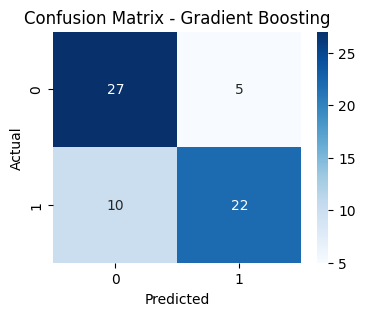

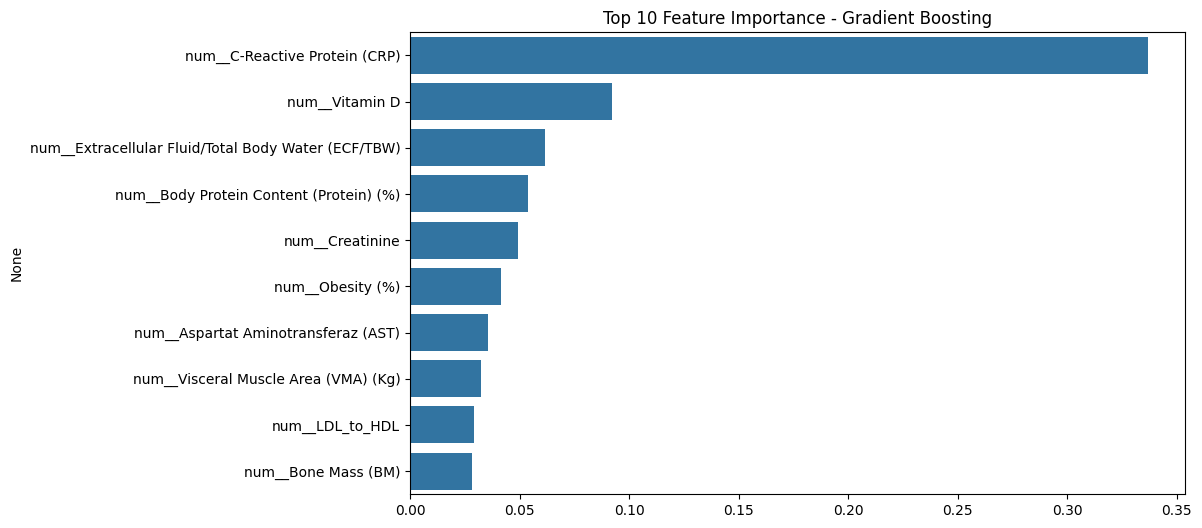

In [ ]:
#@title Model 2: Gradient Boosting

start = time.time()
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_p, y_train)
end = time.time()

y_pred_gb = gb.predict(X_test_p)
y_prob_gb = gb.predict_proba(X_test_p)[:,1]

eval_model("Gradient Boosting", y_test, y_pred_gb, y_prob_gb, end-start)

# Feature Importance
feat_names = preprocessor.get_feature_names_out()
feat_imp = pd.Series(gb.feature_importances_, index=feat_names)
feat_imp = feat_imp.sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top 10 Feature Importance - Gradient Boosting")
plt.show()


=== Model Summary (MLP) ===


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 16)             │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 817 (3.19 KB)

 Trainable params: 817 (3.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4427 - loss: 0.8100 - val_accuracy: 0.5938 - val_loss: 0.7132
Epoch 2/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5261 - loss: 0.7528 - val_accuracy: 0.5781 - val_loss: 0.7035
Epoch 3/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5617 - loss: 0.7182 - val_accuracy: 0.5469 - val_loss: 0.6962
Epoch 4/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5695 - loss: 0.7138 - val_accuracy: 0.5781 - val_loss: 0.6895
Epoch 5/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6215 - loss: 0.6936 - val_accuracy: 0.5781 - val_loss: 0.6817
Epoch 6/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6223 - loss: 0.6897 - val_accuracy: 0.6094 - val_loss: 0.6756
Epoch 7/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6383 - loss: 0.6787 - val_accuracy: 0.6719 - val_loss: 0.6704
Epoch 8/25
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6670 - loss: 0.6620 - val_accuracy: 0.6562 - val_loss

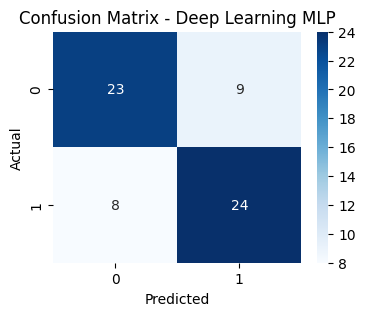

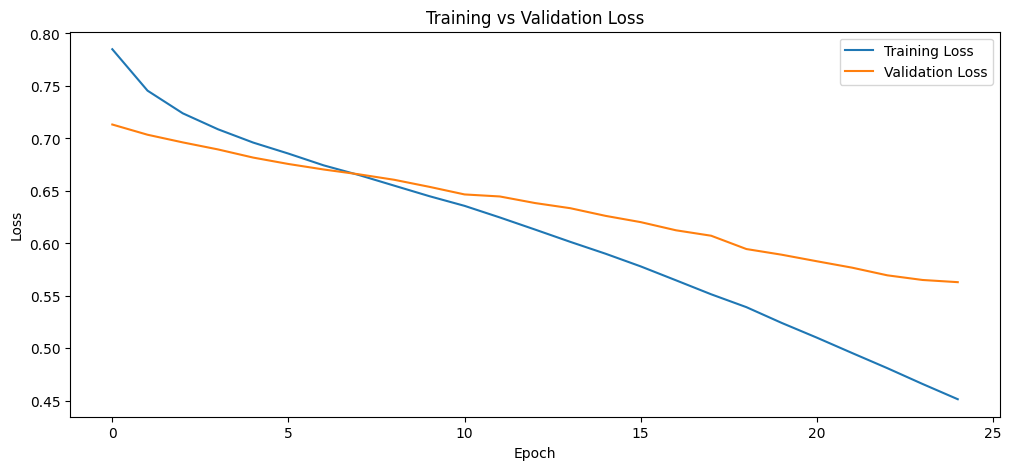

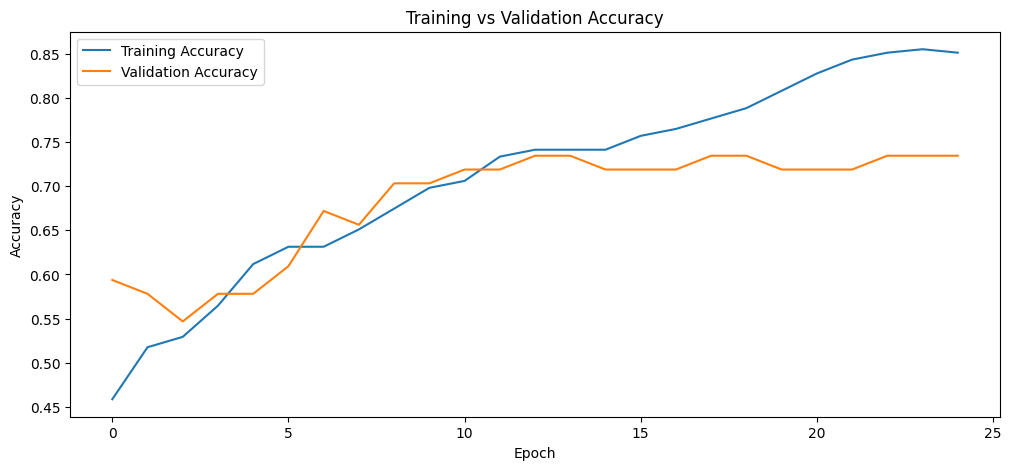


Contoh Prediksi Test Set (MLP):
   Actual  Predicted  Probability
0       1          1     0.621816
1       1          1     0.787154
2       0          0     0.269085
3       0          0     0.470697
4       0          0     0.008350
5       0          0     0.035263
6       1          1     0.760281
7       1          1     0.662971
8       1          1     0.649968
9       1          1     0.803860


In [ ]:
#@title Model 3: Deep Learning (MLP)
input_dim = X_train_p.shape[1]

early_stop = EarlyStopping(
    monitor='loss',
    patience=10,
    restore_best_weights=True
)

mlp = Sequential([
    Dense(16, activation='relu',
          input_shape=(input_dim,),
          kernel_regularizer=l2(0.001)),
    Dense(8, activation='relu',
          kernel_regularizer=l2(0.001)),
    Dense(1, activation='sigmoid')
])

# Model Summary
print("\n=== Model Summary (MLP) ===")
mlp.summary()

mlp.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

start = time.time()
history = mlp.fit(
    X_train_p, y_train,
    validation_data=(X_test_p, y_test),
    epochs=25,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)
end = time.time()

# evaluasi test set
y_prob_dl = mlp.predict(X_test_p).flatten()
y_pred_dl = (y_prob_dl > 0.5).astype(int)

eval_model("Deep Learning MLP", y_test, y_pred_dl, y_prob_dl, end-start)

# Training & Validation Loss per epoch
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Training & Validation Accuracy per epoch
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Prediksi Test Set
pred_sample = pd.DataFrame({
    'Actual': y_test.values[:10],
    'Predicted': y_pred_dl[:10],
    'Probability': y_prob_dl[:10]
})
print("\nContoh Prediksi Test Set (MLP):")
print(pred_sample)

In [ ]:
#perbandingan akhir model
results_df = pd.DataFrame(results).T.sort_values(by='F1-Score', ascending=False)
print("\n=== Perbandingan akhir model ===")
print(results_df.round(4))


=== Perbandingan akhir model ===
                     Accuracy  Precision  Recall  F1-Score     AUC  \
Logistic Regression    0.8125     0.8333  0.7812    0.8065  0.8965   
Gradient Boosting      0.7656     0.8148  0.6875    0.7458  0.8545   
Deep Learning MLP      0.7344     0.7273  0.7500    0.7385  0.8184   

                     Training Time (s)  
Logistic Regression             0.0180  
Gradient Boosting               0.5943  
Deep Learning MLP               4.9746  


<Figure size 1400x600 with 0 Axes>

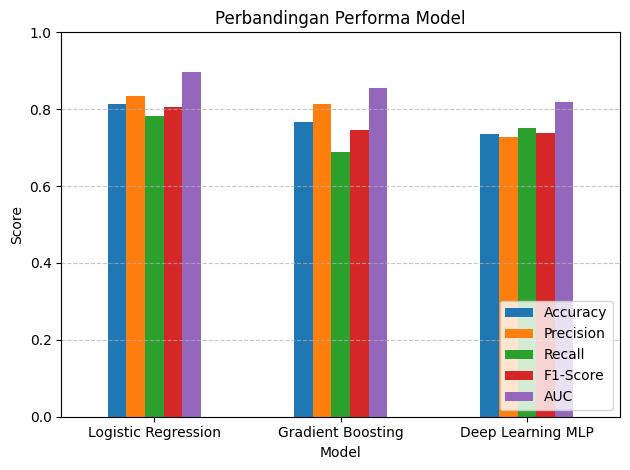

In [ ]:
#visualisasi perbandingan model
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']

plt.figure(figsize=(14, 6))
results_df[metrics].plot(kind='bar')

plt.title('Perbandingan Performa Model')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
joblib.dump(logreg, "logistic_regression_model.pkl")
print("Model Logistic Regression berhasil disimpan")

joblib.dump(gb, "gradient_boosting_model.pkl")
print("Model Gradient Boosting berhasil disimpan")

mlp.save("mlp_deep_learning_model.h5")
print("Model MLP berhasil disimpan")

Model Logistic Regression berhasil disimpan
Model Gradient Boosting berhasil disimpan
Model MLP berhasil disimpan
